# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [179]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [17]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [144]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [146]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = requests.get(query_url + city).json()

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = city_url['weather'][0]['description']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_url['coord']['lat']
        city_lng = city_url['coord']['lon']
        city_max_temp = city_url['main']['temp_max']
        city_humidity = city_url['main']['humidity']
        city_clouds = city_url['clouds']['all']
        city_wind = city_url['wind']['speed']
        city_country = city_url['sys']['country']
        city_date = city_url['dt'] #                                          <<<<< figure out the date formatting!!!!!!!!!!!!!!!!!!!!!!!

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mili
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | ugoofaaru
Processing Record 4 of Set 1 | stanley
Processing Record 5 of Set 1 | whitehorse
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | vilyuysk
Processing Record 8 of Set 1 | udachny
Processing Record 9 of Set 1 | kingston
Processing Record 10 of Set 1 | siwa oasis
Processing Record 11 of Set 1 | kodiak
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | dudinka
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | taiohae
City not found. Skipping...
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | utrik
Processing Record 18 of Set 1 | edinburgh of the seven seas
Processing Record 19 of Set 1 | daru
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | west island
Processing Record 22 of Set 1 | bla

In [148]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [150]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mili,6.0815,171.7350,29.12,76,54,6.51,MH,1724701081
1,adamstown,-25.0660,-130.1015,18.65,73,100,7.81,PN,1724701082
2,ugoofaaru,5.6667,73.0000,27.85,73,39,3.51,MV,1724701083
3,stanley,54.8680,-1.6985,15.01,79,75,3.09,GB,1724701084
4,whitehorse,60.7161,-135.0538,11.56,61,75,2.06,CA,1724701085


In [154]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [181]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mili,6.0815,171.7350,29.12,76,54,6.51,MH,1724701081
1,adamstown,-25.0660,-130.1015,18.65,73,100,7.81,PN,1724701082
2,ugoofaaru,5.6667,73.0000,27.85,73,39,3.51,MV,1724701083
3,stanley,54.8680,-1.6985,15.01,79,75,3.09,GB,1724701084
4,whitehorse,60.7161,-135.0538,11.56,61,75,2.06,CA,1724701085


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

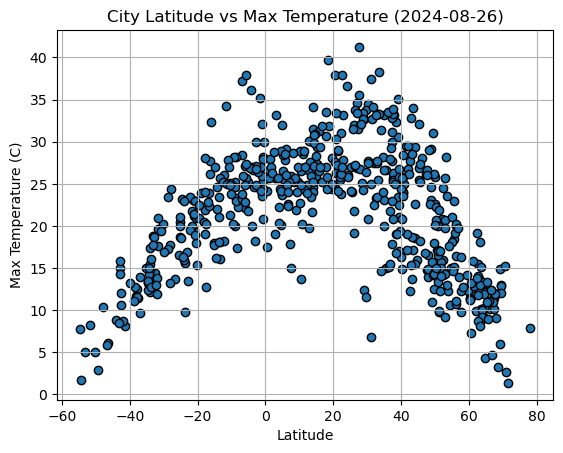

In [184]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature (2024-08-26)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

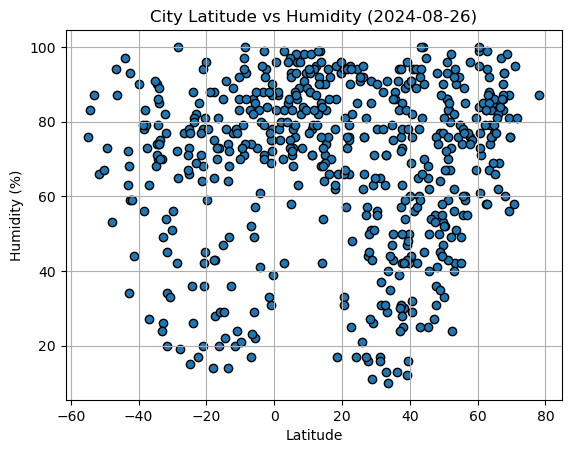

In [187]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (2024-08-26)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

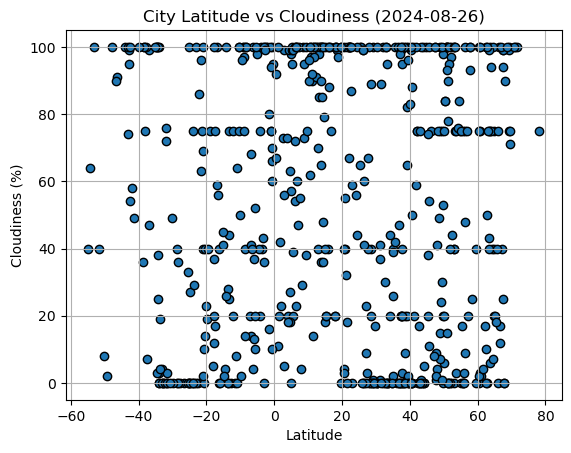

In [190]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (2024-08-26)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

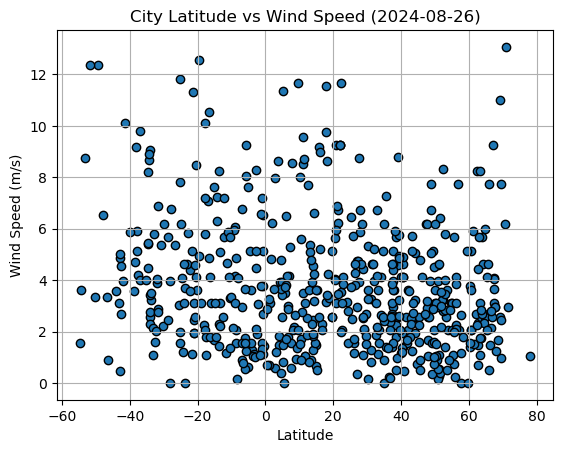

In [193]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (2024-08-26)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [196]:
### Define a function to create Linear Regression plots

# required variables for x-axis and y-axis of the plot
x_label = "X Label"
x_values = [0,1,2]

y_label = "Y Label"
y_values = [0,1,2]

def add_lin_reg_plot(x_label, x_values, y_label, y_values):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Create the scatter plot
    plt.scatter(x_values, y_values, marker="o", edgecolors='black')

    # Create and plot the regression line
    reg_line = x_values * slope + intercept
    plt.plot(x_values, reg_line, color='r')

    # Add labels and legend
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"{x_label} vs {y_label}")

    # Set the Annotation Equation
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Annotate in lower or upper left corner, based on slope
    if slope >=0:
        plt.annotate(line_eq,(min(x_values),max(y_values)*.9),fontsize=15,color="red")
    else:
        plt.annotate(line_eq,(min(x_values),min(y_values)),fontsize=15,color="red")

    # Show the R^2 Value
    print(f"The r^2-value is: {rvalue**2}")

    # Show the plot
    plt.show()

In [198]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mili,6.0815,171.7350,29.12,76,54,6.51,MH,1724701081
2,ugoofaaru,5.6667,73.0000,27.85,73,39,3.51,MV,1724701083
3,stanley,54.8680,-1.6985,15.01,79,75,3.09,GB,1724701084
4,whitehorse,60.7161,-135.0538,11.56,61,75,2.06,CA,1724701085
6,vilyuysk,63.7553,121.6247,10.15,79,100,1.76,RU,1724701088


In [200]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,adamstown,-25.0660,-130.1015,18.65,73,100,7.81,PN,1724701082
5,port-aux-francais,-49.3500,70.2167,2.85,73,2,12.35,TF,1724701086
11,waitangi,-43.9535,-176.5597,8.79,97,100,3.58,NZ,1724701093
13,new norfolk,-42.7826,147.0587,14.95,68,99,4.87,AU,1724701095
16,edinburgh of the seven seas,-37.0676,-12.3116,9.71,63,47,9.79,SH,1724701100


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.4246299498817111


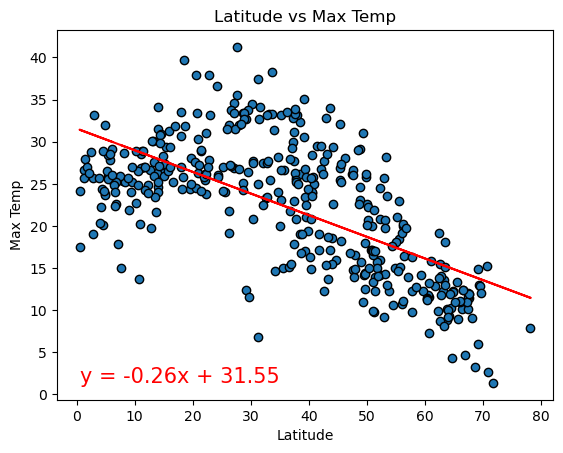

In [203]:
# Linear regression on Northern Hemisphere

# required variables for x-axis and y-axis of the plot
x_label = "Latitude"
x_values = northern_hemi_df["Lat"]

y_label = "Max Temp"
y_values = northern_hemi_df["Max Temp"]

# linear regression function created previously
add_lin_reg_plot(x_label, x_values, y_label, y_values)

The r^2-value is: 0.7028472679796307


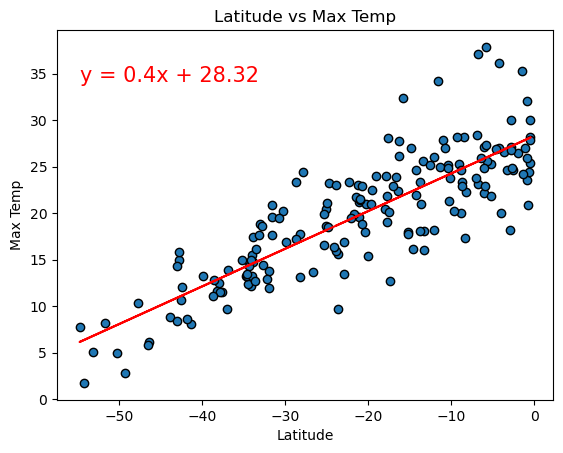

In [205]:
# Linear regression on Southern Hemisphere

# required variables for x-axis and y-axis of the plot
x_label = "Latitude"
x_values = southern_hemi_df["Lat"]

y_label = "Max Temp"
y_values = southern_hemi_df["Max Temp"]

# linear regression function created previously
add_lin_reg_plot(x_label, x_values, y_label, y_values)

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.0058663380851525625


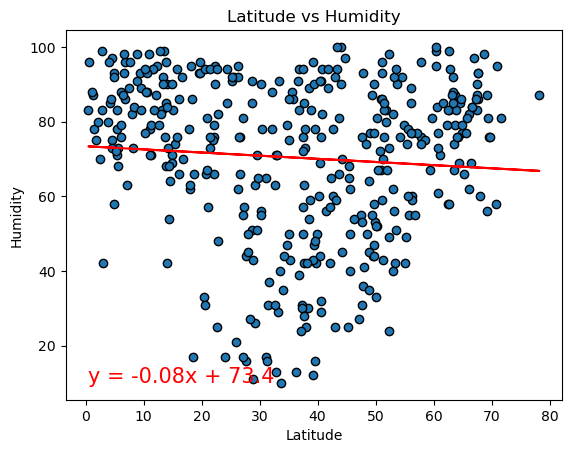

In [208]:
# Northern Hemisphere

# required variables for x-axis and y-axis of the plot
x_label = "Latitude"
x_values = northern_hemi_df["Lat"]

y_label = "Humidity"
y_values = northern_hemi_df["Humidity"]

# linear regression function created previously
add_lin_reg_plot(x_label, x_values, y_label, y_values)

The r^2-value is: 8.083386019943651e-07


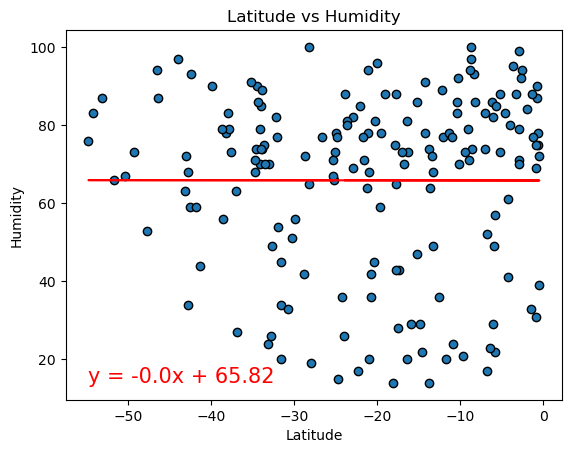

In [210]:
# Southern Hemisphere

# required variables for x-axis and y-axis of the plot
x_label = "Latitude"
x_values = southern_hemi_df["Lat"]

y_label = "Humidity"
y_values = southern_hemi_df["Humidity"]

# linear regression function created previously
add_lin_reg_plot(x_label, x_values, y_label, y_values)

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.013550555861841446


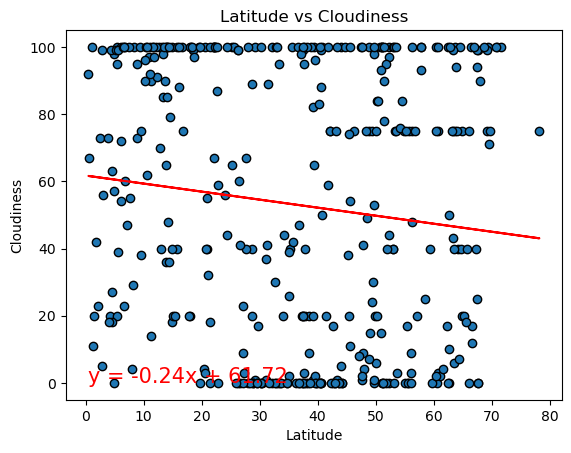

In [213]:
# Northern Hemisphere

# required variables for x-axis and y-axis of the plot
x_label = "Latitude"
x_values = northern_hemi_df["Lat"]

y_label = "Cloudiness"
y_values = northern_hemi_df["Cloudiness"]

# linear regression function created previously
add_lin_reg_plot(x_label, x_values, y_label, y_values)

The r^2-value is: 0.001203176334526071


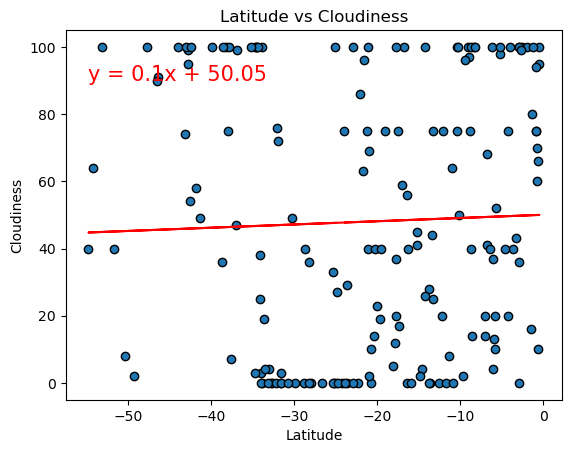

In [215]:
# Southern Hemisphere
# required variables for x-axis and y-axis of the plot
x_label = "Latitude"
x_values = southern_hemi_df["Lat"]

y_label = "Cloudiness"
y_values = southern_hemi_df["Cloudiness"]

# linear regression function created previously
add_lin_reg_plot(x_label, x_values, y_label, y_values)

**Discussion about the linear relationship:** 
# There is a slightly inverse relationship between the cloudiness by latitude in the northern vs the southern hemispheres, but not as noticeable or as statistically strong as the relationship between max temps. Because the correlation is not strong and the dataset only covers one point in time, I would hesitate to draw any conclusions.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.009761274123115851


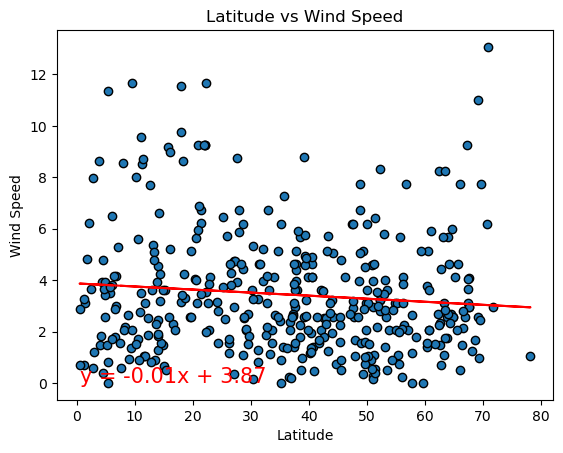

In [219]:
# Northern Hemisphere

# required variables for x-axis and y-axis of the plot
x_label = "Latitude"
x_values = northern_hemi_df["Lat"]

y_label = "Wind Speed"
y_values = northern_hemi_df["Wind Speed"]

# linear regression function created previously
add_lin_reg_plot(x_label, x_values, y_label, y_values)

The r^2-value is: 0.046362568926972506


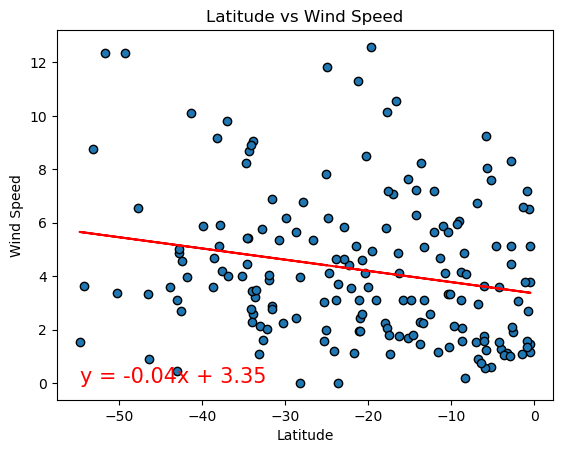

In [221]:
# Southern Hemisphere

# required variables for x-axis and y-axis of the plot
x_label = "Latitude"
x_values = southern_hemi_df["Lat"]

y_label = "Wind Speed"
y_values = southern_hemi_df["Wind Speed"]

# linear regression function created previously
add_lin_reg_plot(x_label, x_values, y_label, y_values)

**Discussion about the linear relationship:** 
# These graphs seem to indicate that the Southern Hemisphere is generally windier than the Northern Hemisphere. Because this dataset is a snapshot of one time, I would hesitate to draw conclusions about windspeeds generally, but these graphs definitely raise questions.